# Spatiotemporal pattern

The Spatiotemporal Pattern function in SOAPy employs tensor decomposition to extract components from the three-order expression tensor (“Time-Space-Gene”), revealing hidden patterns and reducing the complexity of data explanation.
We used Nanosting DSP mouse developmental samples to explore the spatio-temporal developmental relationships of three major organs: heart, lung, and midgut.

Download from https://nanostring.com/products/geomx-digital-spatial-profiler/spatial-organ-atlas/mouse-development/

## Read and preprocessing

In [1]:
import SOAPy_st as sp
import scanpy as sc
import numpy as np

C:\Users\Administrator.DESKTOP-MAL5PKV\anaconda3\envs\toolCV\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Administrator.DESKTOP-MAL5PKV\anaconda3\envs\toolCV\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Administrator.DESKTOP-MAL5PKV\anaconda3\envs\toolCV\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# imput data
adata = sc.read_h5ad('mouse_embryo_dsp_adata.h5ad')

Firstly, the AOI of the three organs were extracted in adata.

In [3]:
adata = adata[np.isin(adata.obs['Tissue'], ['Heart', 'Lung', 'Midgut']), :].copy()

In [4]:
sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=1000)
# adata = adata[:, adata.var['highly_variable'] == True].copy()
adata.obs['Tissue_s'] = adata.obs['Tissue'] + ' ' + adata.obs['Tissue_substructure']

## Tensor decomposition

In the following, 3D-tensor is constructed by subtissues, time points, and genes. 

Tensors can be generated automatically by `sp.tl.TensorDecomposition()` and contain gene information by default, only requiring the user to provide labels for other dimensions.

In [5]:
tensor = sp.tl.TensorDecomposition()
tensor.tensor_with_gene(adata, obs_factor=['Tissue_s', 'Timepoint'])

The first 1000 hypervariable genes are selected and standardized, and then the nonnegative CANDECOMP/PARAFAC(CP) tensor with rank 7 is decomposed by `Tensor.cp_decomposition()` to obtain the factor matrix and weight of the 7 factors.

In [6]:
tensor.highly_variable(factor_name='gene', top_num=1000) # select 1000 high variable genes
tensor.normalization(factor_name='gene', method='max') # normalization used the maximum value
weights, factors, nre = tensor.CP_decomposition(rank=7, non_negative=True, random_state=10)

## Visualizing the results

Three bars show the composition of subtissues, time points, and genes within each factor.

C:\Users\Administrator.DESKTOP-MAL5PKV\anaconda3\envs\toolCV\lib\site-packages\soapy\pl\_tensor.py:143: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


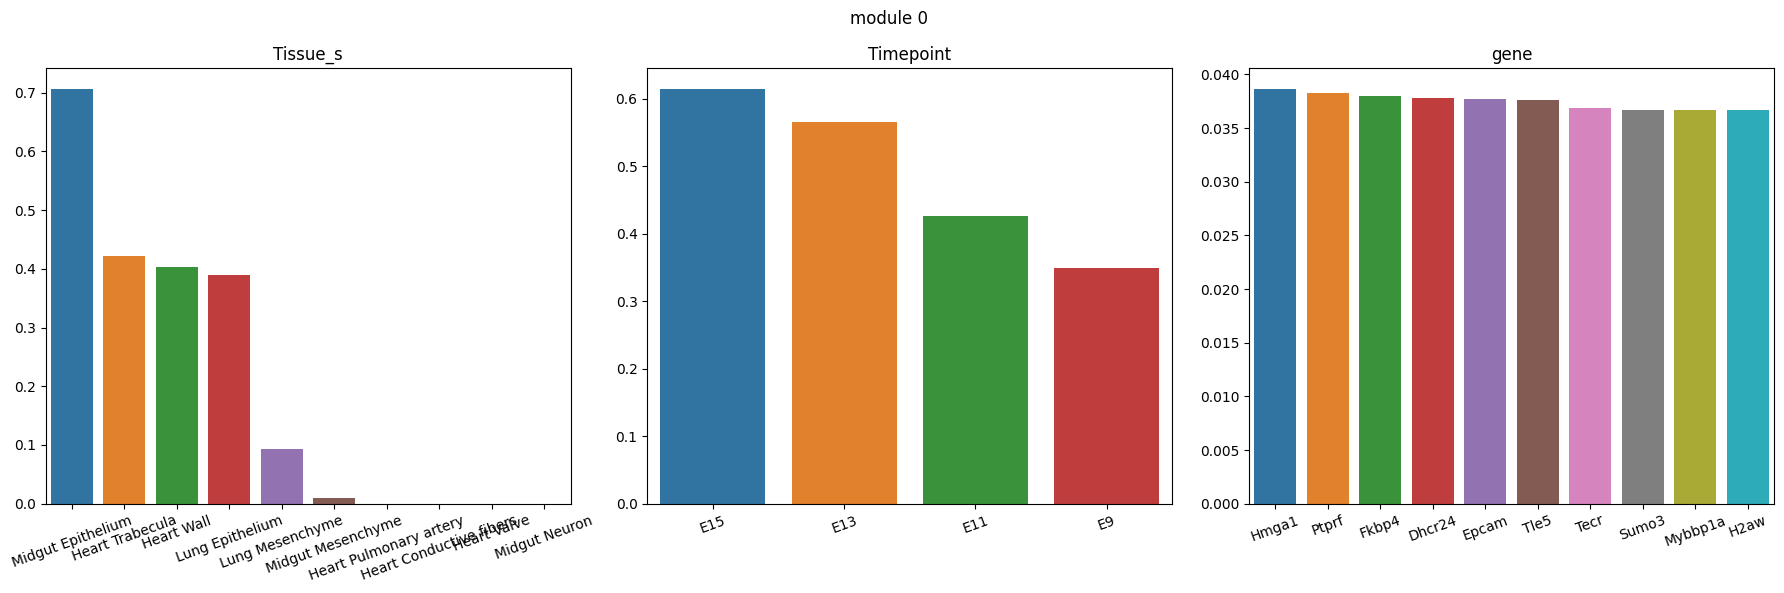

In [7]:
sp.pl.show_proportion_in_CP(tensor, module=0, max_key=10)

C:\Users\Administrator.DESKTOP-MAL5PKV\anaconda3\envs\toolCV\lib\site-packages\soapy\pl\_tensor.py:143: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


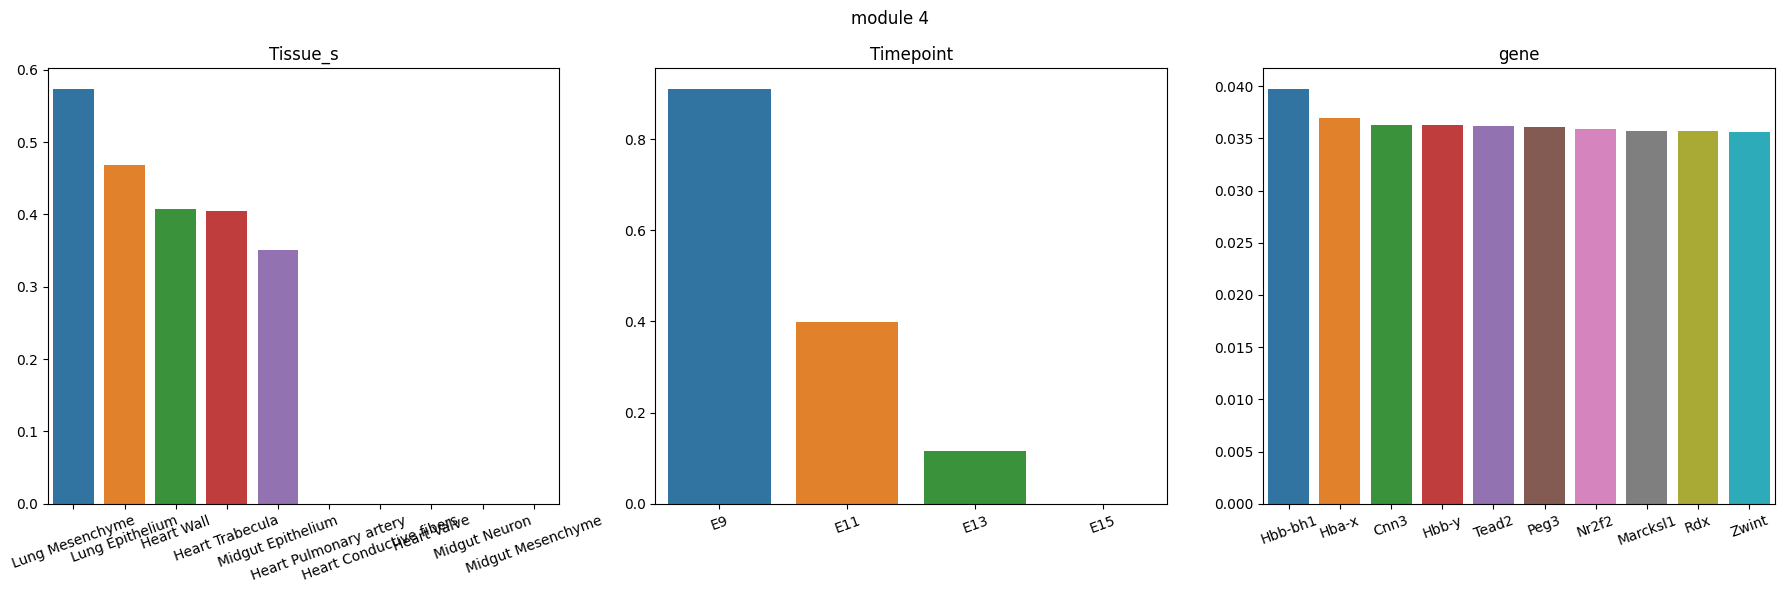

In [8]:
sp.pl.show_proportion_in_CP(tensor, module=4, max_key=10)